In [8]:
from datasets import load_dataset
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [3]:
# Loading up data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

In [ ]:
# Cleaning up data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(
    lambda job_skill: ast.literal_eval(job_skill) if pd.notna(job_skill) else job_skill
)

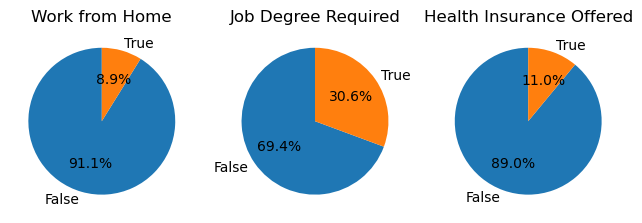

In [54]:
fig, ax = plt.subplots(1, 3)
dict_column = {
    "job_work_from_home": "Work from Home",
    "job_no_degree_mention": "Job Degree Required",
    "job_health_insurance": "Health Insurance Offered",
}
for i, (column, title) in enumerate(dict_column.items()):
    df[column].value_counts().plot(
        kind="pie", ax=ax[i], title=title, startangle=90, autopct="%1.1f%%", ylabel=""
    )
fig.tight_layout()